In [1]:
import sys
import os
import json
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import seaborn as sns

from notebook_utils import *
sys.path.append("../experiment_utils")
sys.path.append("../data_analysis")
from experiment_utils import load_domain_env
from scene_analysis import env_stats

# Benutzungserklärung

# 4.1 Mess-Idiosynchrasien

### Straßenarten und Länder

In [2]:
path_Trajectron = '../results/Land_und_Strassenart'
path_MANTRA = '../../Mantra/results/Land_und_Strassenart'

In [3]:
results_Trajectron = load_results_dict(path_Trajectron)
results_MANTRA = load_results_dict(path_MANTRA)

df_Trajectron = country_or_road_class_dict2df(results_Trajectron)
df_MANTRA = country_or_road_class_dict2df(results_MANTRA)

df = pd.concat([df_Trajectron, df_MANTRA], axis=0)
df.index = pd.MultiIndex.from_product([['Trajectron++', 'MANTRA'], df_MANTRA.index], names=['Model', 'Training'])
df

Metrik                              minADE_5_[m]              \
Änderung                                   keine        Land   
Details                          in distribution USA <-> SGP   
Model        Training                                          
Trajectron++ nuScenes_Queenstown            1.28        1.43   
             nuScenes_Onenorth              1.32        0.83   
             nuScenes_Boston                1.28        1.42   
             lyft_level_5                   1.21        2.10   
MANTRA       nuScenes_Queenstown            1.20        0.87   
             nuScenes_Onenorth              1.19        1.18   
             nuScenes_Boston                1.08        1.24   
             lyft_level_5                   1.17        1.50   

Metrik                                                                   \
Änderung                                     Straßenart                   
Details                          innerhalb Stadtverkehr zu Kreisverkehr   
Model        Training                                                     
Trajectron++ nuScenes_Queenstown                   1.30            5.80   
             nuScenes_Onenorth                     1.25            5.51   
             nuScenes_Boston                       1.56            5.50   
             lyft_level_5                          1.99            6.86   
MANTRA       nuScenes_Queenstown                   1.34            4.20   
             nuScenes_Onenorth                     1.22            4.22   
             nuScenes_Boston                       0.80            4.20   
             lyft_level_5                          1.57            4.55   

Metrik                                              SDRGE [%]  \
Änderung                                                 Land   
Details                          zu Schnellstraße USA <-> SGP   
Model        Training                                           
Trajectron++ nuScenes_Queenstown             4.01       10.49   
             nuScenes_Onenorth               2.95      -59.04   
             nuScenes_Boston                 2.78        9.86   
             lyft_level_5                    3.48       42.38   
MANTRA       nuScenes_Queenstown             2.38      -37.93   
             nuScenes_Onenorth               4.86       -0.85   
             nuScenes_Boston                 3.77       12.90   
             lyft_level_5                    2.48       22.00   

Metrik                                                                   \
Änderung                                     Straßenart                   
Details                          innerhalb Stadtverkehr zu Kreisverkehr   
Model        Training                                                     
Trajectron++ nuScenes_Queenstown                   1.54           77.93   
             nuScenes_Onenorth                    -5.60           76.04   
             nuScenes_Boston                      17.95           76.73   
             lyft_level_5                         39.20           82.36   
MANTRA       nuScenes_Queenstown                  10.45           71.43   
             nuScenes_Onenorth                     2.46           71.80   
             nuScenes_Boston                     -35.00           74.29   
             lyft_level_5                         25.48           74.29   

Metrik                                             
Änderung                                           
Details                          zu Schnellstraße  
Model        Training                              
Trajectron++ nuScenes_Queenstown            68.08  
             nuScenes_Onenorth              55.25  
             nuScenes_Boston                53.96  
             lyft_level_5                   65.23  
MANTRA       nuScenes_Queenstown            49.58  
             nuScenes_Onenorth              75.51  
             nuScenes_Boston                71.35  
             lyft_level_5                   52.82

In [4]:
# CREATE EXCEL 

# metric = "SDRGE [%]"
# mean=df[metric].mean(axis=0)
# std=df[metric].std(axis=0)
# df_excel = pd.concat([mean, std], axis=1)
# df_excel.columns = ['mean', 'std']
# rename_df(df_excel).to_excel('../excel/Strassenarten_und_Laender.xlsx')
# rename_df(df["minADE_5_[m]"]).to_excel('../excel/Strassenarten_und_Laender_minADE.xlsx')

In [5]:
figsize = (15, 10)
fontsize = 15

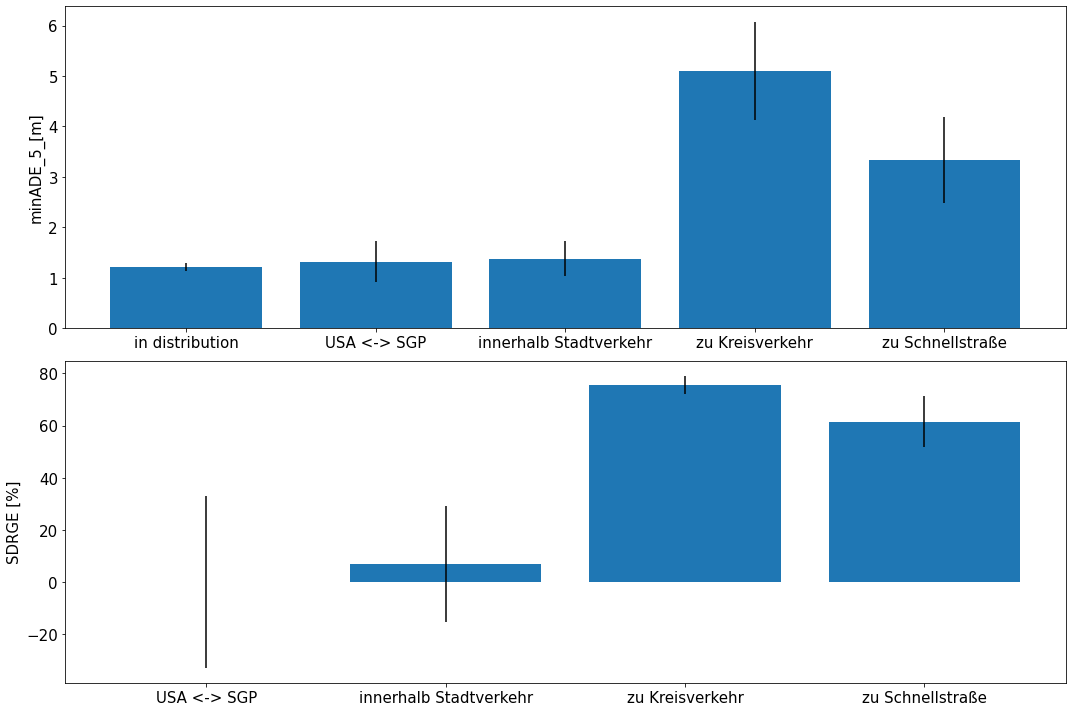

In [6]:
metrics = df.columns.get_level_values('Metrik').unique()
fig, ax = plt.subplots(len(metrics), figsize=figsize)
for i, metric in enumerate(metrics):
    x=df[metric].columns.get_level_values('Details').unique()
    height=df[metric].mean(axis=0)
    yerr=df[metric].std(axis=0)
    ax[i].bar(x=x, height=height, yerr=yerr)
    ax[i].set_ylabel(metric, fontsize=fontsize)
    ax[i].tick_params(axis='both', labelsize=fontsize)
plt.tight_layout()

### Geschwindigkeitsbereiche

In [7]:
path_Trajectron = '../results/Geschwindigkeitsbereich'
path_MANTRA = '../../Mantra/results/Geschwindigkeitsbereich'

In [8]:
results_Trajectron = load_results_dict(path_Trajectron)
results_MANTRA = load_results_dict(path_MANTRA)

df_Trajectron = speed_zone_dict2df(results_Trajectron)
df_MANTRA = speed_zone_dict2df(results_MANTRA)

df = pd.concat([df_Trajectron,df_MANTRA], axis=0)
df.index = pd.MultiIndex.from_product([['Trajectron++', 'MANTRA'], df_MANTRA.index], names=['Model', 'Training'])
df

Metrik                           minADE_5 [m]                  SDRGE [%]  \
Geschwindigkeitsbereich                  slow middle  fast middle ->slow   
Model        Training                                                      
Trajectron++ nuScenes_Queenstown         1.50   1.32  1.66         13.64   
             nuScenes_Onenorth           1.33   1.28  2.14          3.91   
             nuScenes_Boston             0.80   1.28  1.68        -37.50   
             lyft_level_5                1.23   1.21  1.62          1.65   
MANTRA       nuScenes_Queenstown         1.61   1.20  1.68         34.17   
             nuScenes_Onenorth           1.34   1.19  2.10         12.61   
             nuScenes_Boston             0.86   1.08  1.59        -20.37   
             lyft_level_5                1.30   1.20  2.46          8.33   

Metrik                                          
Geschwindigkeitsbereich          middle ->fast  
Model        Training                           
Trajectron++ nuScenes_Queenstown         25.76  
             nuScenes_Onenorth           67.19  
             nuScenes_Boston             31.25  
             lyft_level_5                33.88  
MANTRA       nuScenes_Queenstown         40.00  
             nuScenes_Onenorth           76.47  
             nuScenes_Boston             47.22  
             lyft_level_5               105.00

In [9]:
# CREATE EXCEL 


# metric = "SDRGE [%]"
# mean = df[metric].mean(axis=0)
# std = df[metric].std(axis=0)
# df_excel = pd.concat([mean, std], axis=1)
# df_excel.columns = ['mean', 'std']
# rename_df(df_excel).to_excel('../excel/Geschwindigkeitsbereiche.xlsx')
# rename_df(df).to_excel('../excel/Geschwindigkeitsbereiche_minADE.xlsx')

In [10]:
figsize = (15, 10)
fontsize = 15

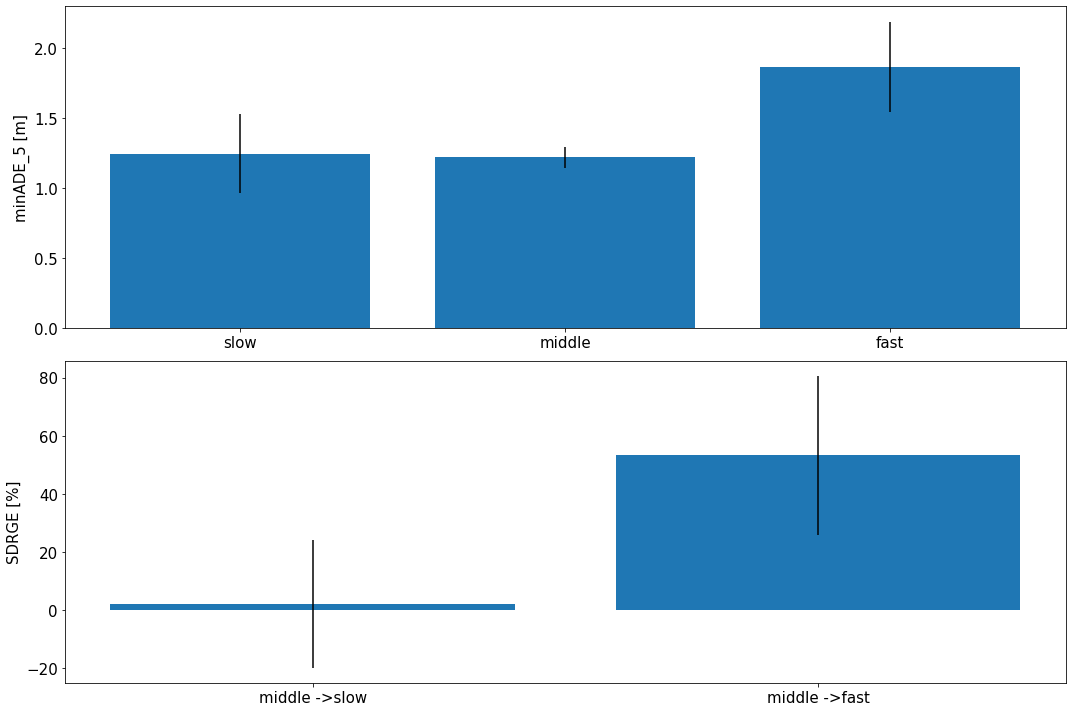

In [11]:
metrics = df.columns.get_level_values('Metrik').unique()
fig, ax = plt.subplots(len(metrics), figsize=figsize)

for i, metric in enumerate(metrics):
    x=df[metric].columns
    height=df[metric].mean(axis=0)
    yerr=df[metric].std(axis=0)
    ax[i].bar(x=x, height=height, yerr=yerr)
    ax[i].set_ylabel(metric, fontsize=fontsize)
    ax[i].tick_params(axis='both', labelsize=fontsize)
plt.tight_layout()

# 4.2 Daten-Idiosynchrasie

### 4.2.1 Datenanalyse

In [13]:
class Arguments():
    pass
args = Arguments()
args.node_type = 'VEHICLE'
args.max_hl = 4
args.override_attention_radius = []
args.scene_freq_mult_train = False
args.min_scene_interaction_density = 0
args.conf = "../models/original_config/robot/config.json"

#_, hyperparams = load_model("robot/openDD")
with open(args.conf, "r", encoding="utf-8") as conf_json:
    hyperparams = json.load(conf_json)
idx = pd.MultiIndex.from_tuples([('slow', 'nuScenes_Queenstown'), 
                                ('middle', 'nuScenes_Queenstown'),
                                ('fast', 'nuScenes_Queenstown'),
                               ('slow', 'nuScenes_Onenorth'), 
                               ('middle', 'nuScenes_Onenorth'),
                               ('fast', 'nuScenes_Onenorth'),
                               ('slow', 'nuScenes_Boston'), 
                               ('middle', 'nuScenes_Boston'),
                               ('fast', 'nuScenes_Boston'),
                               ('slow', 'lyft_level_5'), 
                               ('middle', 'lyft_level_5'),
                               ('fast', 'lyft_level_5'),
                               ('special', 'KITTI_fast'),
                               ('special', 'openDD')
                              ],
                              names=['speed_zone', 'location'])

df_per_env_list = list()
for speed_zone, location in idx:
    data_dir = location + ('' if speed_zone=='special' else ( '_' + speed_zone))
    train = True if data_dir=='lyft_level_5_middle' else False
    env = load_domain_env(args, hyperparams, data_dir, train=train, speed='')
    df_env = env_stats(env)
    df_per_env_list.append(df_env)
df = pd.concat(df_per_env_list, axis=0)
df = df.astype(int)
df.index = idx

df_domains = df.loc[['middle', 'special']]
df_domains.reset_index(level=[0], drop=True, inplace=True)

speeds = df.index.get_level_values('speed_zone').unique()
df_speed_zones = pd.concat([df.loc[speed].mean().to_frame().T for speed in speeds if speed != 'special'], axis=0)
df_speed_zones.index = [speed for speed in speeds if speed != 'special']
df_speed_zones = df_speed_zones.astype(int)

0it [00:00, ?it/s]


KeyError: 'Bewegungsart'

In [ ]:
# TO EXCEL 


# rename_df(df_speed_zones).to_excel('../excel/Datenanalyse_Geschwindigkeitsbereich.xlsx')
# rename_df(df_domains).to_excel('../excel/Datenanalyse_Domain.xlsx')

### Zusammensetzung nach Ort

In [ ]:
figsize=(20,50)
fontsize = 25

In [ ]:
characteristics = df_domains.columns.get_level_values('Fahrcharakteristik').unique()

fig, ax = plt.subplots(len(characteristics), figsize=figsize)

for i, characteristic in enumerate(characteristics):
    df_domains[characteristic].plot.barh(stacked=True, ax=ax[i])
    ax[i].tick_params(axis='both', labelsize=fontsize)
    ax[i].set_xlabel('Domänen', fontsize=fontsize)
    ax[i].set_xlabel('Anteil', fontsize=fontsize)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)

### Zusammensetzung nach Geschwindigkeitsbereich

In [ ]:
figsize=(20,30)
fontsize=20

In [ ]:
fig, ax = plt.subplots(len(characteristics), figsize=figsize)
for i, characteristic in enumerate(characteristics):
    df_speed_zones[characteristic].plot.barh(stacked=True, ax=ax[i])
    ax[i].tick_params(axis='both', labelsize=fontsize)
    ax[i].set_xlabel('Geschwindigkeitsbereich', fontsize=fontsize)
    ax[i].set_xlabel('Anteil', fontsize=fontsize)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)

### 4.2.2 Erfassungsschwierigkeit (in distribution)

In [ ]:
path_Trajectron = '../results/in_distribution'
path_MANTRA = '../../Mantra/results/in_distribution'

In [ ]:
results_Trajectron = load_results_dict(path_Trajectron)
results_MANTRA = load_results_dict(path_MANTRA)

df_Trajectron = driving_characteristic_dict2df(results_Trajectron)
df_MANTRA = driving_characteristic_dict2df(results_MANTRA)

df_Trajectron = metric2float(df_Trajectron)
df_MANTRA = metric2float(df_MANTRA)

df = pd.concat([df_Trajectron, df_MANTRA], axis=1)
df.columns = pd.MultiIndex.from_product([('Trajectron++', 'MANTRA'), df_Trajectron.columns], names=['Model', 'Training'])
df = df[df != 0]
df

In [ ]:
# TO EXCEL


# for model in df.columns.get_level_values('Model').unique():
#     df.loc[:, (model, 'mean')] = df[model].mean(axis=1, skipna=True).round(2)
#     df.loc[:, (model, 'std')] = df[model].std(axis=1, skipna=True).round(2)
# rename_df(df).to_excel('../excel/Erfassungsschwierigkeit.xlsx')

In [ ]:
figsize=(15, 30)
fontsize = 20
hspace = 0.5

In [ ]:
models = df.columns.get_level_values('Model').unique()
characteristics = df.index.get_level_values('Fahrcharakteristik').unique()

fig, ax = plt.subplots(len(characteristics), figsize=figsize)
plt.subplots_adjust(hspace=hspace)

for i, characteristic in enumerate(characteristics):
    for j, model in enumerate(models):

        categories = df.loc[characteristic].index.tolist()
        setoff = 3
        yticks_num_spaced = np.arange(1, setoff*len(categories), setoff) + j
        yticks_num = range(1, 3*len(categories))
        ax[i].barh(y=yticks_num_spaced, 
                   width=df.loc[characteristic, model].mean(axis=1, skipna=True).tolist(), 
                   xerr=df.loc[characteristic, model].std(axis=1, skipna=True).tolist(),
                   label=model)
        if j==0:
            yticks_str_spaced = []
            for c in range(len(yticks_num) - len(yticks_num_spaced)):
                yticks_str_spaced.append('')
                if c < len(categories):
                    yticks_str_spaced.append('')
                    yticks_str_spaced.append(categories[c])
                
        ax[i].set_yticklabels(yticks_str_spaced, fontsize=fontsize)
        ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
        ax[i].set_ylabel(characteristic, fontsize=fontsize)
        ax[i].set_xlabel('minADE_5 [m]', fontsize=fontsize)


# 4.2.3 Out of Distribution Generalisierung

### nuScenes_Boston <-> nuScenes Onenorth

In [ ]:
path_Trajectron = '../results/out_of_distribution/nuScenes_Boston_nuScenes_Onenorth'
path_MANTRA = '../../Mantra/results/out_of_distribution/nuScenes_Boston_nuScenes_Onenorth'

In [ ]:
df = get_out_of_distribution_df(path_Trajectron, path_MANTRA)
df = sort_by(df, "Evaluation")
df_TDRGE = TDRGE_version(df, relative=True)
df_TDGE = TDRGE_version(df, relative=False)
df

In [ ]:
# TO EXCEL

# df_word = rename_df(sort_by(pd.concat([df, df_TDRGE], axis=1), dataset="Evaluation"))
# df_word.to_excel("../excel/nuScenes_Boston_nuScenes_Onenorth_ADE_and_TDRGE.xlsx")
# rename_df(df_TDGE).to_excel("../excel/nuScenes_Boston_nuScenes_Onenorth_TDGE.xlsx")
# rename_df(df_TDRGE).to_excel("../excel/nuScenes_Boston_nuScenes_Onenorth_TDRGE.xlsx")
# rename_df(sort_by(df, "Evaluation")).to_excel("../excel/nuScenes_Boston_nuScenes_Onenorth_ADE.xlsx")

In [ ]:
fig, ax = visualize_out_of_distribution(df)
fig.show()

### nuScenes_Boston, lyft_level_5

In [ ]:
path_Trajectron = "../results/out_of_distribution/nuScenes_Boston_lyft_level_5"
path_MANTRA = "../../Mantra/results/out_of_distribution/nuScenes_Boston_lyft_level_5"

In [ ]:
df = get_out_of_distribution_df(path_Trajectron, path_MANTRA)
df = sort_by(df, "Evaluation")
df_TDRGE = TDRGE_version(df, relative=True)
df_TDGE = TDRGE_version(df, relative=False)
df

In [ ]:
# TO EXCEL


# df_word = rename_df(sort_by(pd.concat([df, df_TDRGE], axis=1), dataset="Evaluation"))
# df_word.to_excel("../excel/nuScenes_Boston_lyft_level_5_ADE_and_TDRGE.xlsx")
# rename_df(df_TDGE).to_excel("../excel/nuScenes_Boston_lyft_level_5_TDGE.xlsx")
# rename_df(df_TDRGE).to_excel("../excel/nuScenes_Boston_lyft_level_5_TDRGE.xlsx")
# rename_df(sort_by(df, "Evaluation")).to_excel("../excel/nuScenes_Boston_lyft_level_5_ADE.xlsx")

In [ ]:
fig, ax = visualize_out_of_distribution(df)
fig.show()

### nuScenes_Boston, openDD

In [ ]:
path_Trajectron = "../results/out_of_distribution/nuScenes_Boston_openDD"
path_MANTRA = "../../Mantra/results/out_of_distribution/nuScenes_Boston_openDD"

In [ ]:
df = get_out_of_distribution_df(path_Trajectron, path_MANTRA)
df = sort_by(df, "Evaluation")
df_TDRGE = TDRGE_version(df, relative=True)
df_TDGE = TDRGE_version(df, relative=False)
df

In [ ]:
# TO EXCEL


# df_word = rename_df(sort_by(pd.concat([df, df_TDRGE], axis=1), dataset="Evaluation"))
# df_word.to_excel("../excel/nuScenes_Boston_openDD_ADE_and_TDRGE.xlsx")
# rename_df(df_TDGE).to_excel("../excel/nuScenes_Boston_openDD_TDGE.xlsx")
# rename_df(df_TDRGE).to_excel("../excel/nuScenes_Boston_openDD_TDRGE.xlsx")
# rename_df(sort_by(df, "Evaluation")).to_excel("../excel/nuScenes_Boston_openDD_ADE.xlsx")

In [ ]:
fig, ax = visualize_out_of_distribution(df)
fig.show()

# 4.3 Ablationsstudie

### 4.3.1 Trajectron++

### Karten-Ablation

In [ ]:
path = "../results/ablation/robot_no_map"

In [ ]:
results = load_results_dict(path)
df = ablation_dict2df(results)
df = metric2float(df)
df_T_map_ADE = df
df

In [ ]:
fig, ax, df_excel_T_map = visualize_ablation(df, 
                             normal_version='robot',
                             ablation_version='robot_no_map', 
                             figsize=(10, 5), fontsize=15)

### Robot-Ablation

In [ ]:
path = "../results/ablation/int_ee_me"

In [ ]:
results = load_results_dict(path)
df = ablation_dict2df(results)
df = metric2float(df)
df_T_robot_ADE = df
df

In [ ]:
fig, ax, df_excel_T_robot= visualize_ablation(df, 
                             normal_version='robot', 
                             ablation_version='int_ee_me', 
                             figsize=(10, 5), fontsize=15)

### Interaktion-Ablation

In [ ]:
path = "../results/ablation/robot_no_edge"

In [ ]:
results = load_results_dict(path)
df = ablation_dict2df(results)
df = metric2float(df)
df_T_interaction_ADE = df
df

In [ ]:
fig, ax, df_excel_T_interaction = visualize_ablation(df, 
                             normal_version='robot',
                             ablation_version='robot_no_edge', 
                             figsize=(10, 5), fontsize=15)

In [ ]:
# TO EXCEL


# df_word = pd.concat([df_T_map_ADE,
#                      df_T_robot_ADE,
#                      df_T_interaction_ADE])
# df_word = df_word.drop_duplicates()
# df_word = sort_ablation(df_word)
# df_word = rename_df(df_word)
# df_word = rename_df_for_word(df_word)
# df_word.to_excel("../excel/Trajectron_ablation_ADE.xlsx")


# df_excel = pd.concat([df_excel_T_map,
#                       df_excel_T_robot,
#                       df_excel_T_interaction])
# df_excel.index = pd.MultiIndex.from_tuples(zip(
#     ['keine Karte', 'keine Karte', 
#      'kein Robot', 'kein Robot', 
#      'keine Interaktion', 'keine Interaktion'],
#     df_excel.index
# ))
# rename_df(df_excel).to_excel("../excel/Trajectron_ablation.xlsx")

### 4.3.2 MANTRA

### Karten-Ablation

In [ ]:
path = "../../Mantra/results/ablation/no_map"

In [ ]:
results = load_results_dict(path)
df = ablation_dict2df(results)
df = metric2float(df)
df_M_map_ADE = df
df

In [ ]:
fig, ax, df_excel_M_no_map = visualize_ablation(df, 
                             normal_version='MANTRA', 
                             ablation_version='MANTRA_no_map', 
                             figsize=(10, 5), fontsize=15)

### Online Writing

In [ ]:
path = "../../Mantra/results/ablation/online_writing"

In [ ]:
results = load_results_dict(path)
df = ablation_dict2df(results)
df = metric2float(df)
df_M_online_writing_ADE = df
df

In [ ]:
fig, ax, df_excel_M_online_writing = visualize_ablation(df, 
                             normal_version='MANTRA_online_writing', 
                             ablation_version='MANTRA', 
                             vorzeichen = 'Verringerung',
                             figsize=(10, 5), fontsize=15)

In [ ]:
# TO EXCEL

# df_word = pd.concat([df_M_map_ADE,
#                      df_M_online_writing_ADE])
# df_word = df_word.drop_duplicates()
# df_word = sort_ablation(df_word)
# df_word = rename_df(df_word)
# df_word = rename_df_for_word(df_word)
# df_word
# df_word.to_excel("../excel/MANTRA_ablation_ADE.xlsx")


# df_excel = pd.concat([df_excel_M_no_map,
#                       df_excel_M_online_writing])
# df_excel.index = pd.MultiIndex.from_tuples(zip(
#     ['keine Karte', 'keine Karte', 
#      'online writing', 'online writing'],
#     df_excel.index
# ))

# rename_df(df_excel).to_excel("../excel/MANTRA_ablation.xlsx")

# 4.4 Verbesserung der Generalisierung

### 4.4.1 Datendiversität auf Mikrolevel (Datenmenge)

#### Trajectron++

In [ ]:
path = "../results/Verbesserung/large_scale"

In [ ]:
results = load_results_dict(path)
df = Verbesserung_dict2df(results)
df = metric2float(df)
df_T_large_scale_ADE = df
df

In [ ]:
fig, ax, df_excel_T_ls = visualize_ablation(df, 
                             normal_version='robot_large_scale',
                             ablation_version='robot', 
                             vorzeichen='Verringerung',
                             figsize=(10, 5), fontsize=15)

#### MANTRA

In [ ]:
path = "../../Mantra/results/Verbesserung/large_scale"

In [ ]:
results = load_results_dict(path)
df = Verbesserung_dict2df(results)
df = metric2float(df)
df_M_large_scale_ADE = df
df

In [ ]:
fig, ax,df_excel_M_ls = visualize_ablation(df, 
                             normal_version='MANTRA_large_scale',
                             ablation_version='MANTRA', 
                             vorzeichen='Verringerung',
                             figsize=(10, 5), fontsize=15)

### 4.4.2 Datendiversität auf Makrolevel (Domänen Kombination)

#### Trajectron++

In [ ]:
path = "../results/Verbesserung/domain_mix"

In [ ]:
results = load_results_dict(path)
df = Verbesserung_dict2df(results)
df = metric2float(df)
df_T_domain_mix_ADE = df
df

In [ ]:
fig, ax, df_excel_T_dk = visualize_ablation(df, 
                             normal_version='robot_domain_mix',
                             ablation_version='robot', 
                             vorzeichen='Verringerung',
                             figsize=(10, 5), fontsize=15)

#### MANTRA

In [ ]:
path = "../../Mantra/results/Verbesserung/domain_mix"

In [ ]:
results = load_results_dict(path)
df = Verbesserung_dict2df(results)
df = metric2float(df)
df_M_domain_mix_ADE = df
df

In [ ]:
fig, ax,df_excel_M_dk = visualize_ablation(df, 
                             normal_version='MANTRA_domain_mix',
                             ablation_version='MANTRA', 
                             vorzeichen='Verringerung',
                             figsize=(10, 5), fontsize=15)

### 4.4.3 Manipulation der Datenproportionen

In [ ]:
path = "../results/Verbesserung/freq_multiplier"

In [ ]:
results = load_results_dict(path)
df = Verbesserung_dict2df(results)
df = metric2float(df)
df_T_freq_multiplier_ADE = df
df

In [ ]:
fig, ax, df_excel_T_mp = visualize_ablation(df, 
                             normal_version='robot_freq_multiplier',
                             ablation_version='robot', 
                             vorzeichen='Verringerung',
                             figsize=(10, 5), fontsize=15)

In [ ]:
# TO EXCEL


# df_excel_T = pd.concat([df_excel_T_ls,
#                         df_excel_T_dk,
#                         df_excel_T_mp])
# df_excel_T.index = pd.MultiIndex.from_tuples(zip(
#     ['Datendiversität Mikroebene', 'Datendiversität Mikroebene', 
#      'Datendiversität Makroebene', 'Datendiversität Makroebene', 
#      'Manipulation der Datenproportionen', 'Manipulation der Datenproportionen'],
#     df_excel_T.index
# ))
# rename_df(df_excel_T).to_excel("../excel/Trajectron_Verbesserung.xlsx")




# df_excel_M = pd.concat([df_excel_M_ls,
#                         df_excel_M_dk])
# df_excel_M.index = pd.MultiIndex.from_tuples(zip(
#     ['Datendiversität Mikroebene', 'Datendiversität Mikroebene', 
#      'Datendiversität Makroebene', 'Datendiversität Makroebene'],
#     df_excel_M.index
# ))
# rename_df(df_excel_M).to_excel("../excel/MANTRA_Verbesserung.xlsx")




# df_T_domain_mix_ADE = df_T_domain_mix_ADE.reorder_levels(["Training", "Model"], axis=0)
# df_T_domain_mix_ADE = df_T_domain_mix_ADE.drop(index=["openDD"])
# df_T_domain_mix_ADE = df_T_domain_mix_ADE.drop(index=["nuScenes_Boston"])
# df_T_domain_mix_ADE = rename_df(df_T_domain_mix_ADE)
# df_T_domain_mix_ADE = rename_df_for_word(df_T_domain_mix_ADE)

# df_word_T = pd.concat([df_T_large_scale_ADE,
#                        df_T_freq_multiplier_ADE])
# df_word_T = df_word_T.drop_duplicates()
# df_word_T = sort_ablation(df_word_T)
# df_word_T = rename_df(df_word_T)
# df_word_T = rename_df_for_word(df_word_T)
# df_word_T = pd.concat([df_word_T, df_T_domain_mix_ADE], axis=0)
# df_word_T.to_excel("../excel/Trajectron_Verbesserung_ADE.xlsx")




# df_word_M = sort_ablation(df_M_large_scale_ADE)
# df_word_M = pd.concat([df_word_M, df_M_domain_mix_ADE])
# df_word_M = df_word_M.drop_duplicates()
# df_word_M = rename_df(df_word_M)
# df_word_M = rename_df_for_word(df_word_M)
# df_word_M.to_excel("../excel/MANTRA_Verbesserung_ADE.xlsx")